# Plotting the output from Cumulative event counter

### Shortened notebook just for plotting

1. ~Load dictionary of apoptoses and their corresponding times to base the spatiotemporal scans around~ 
2. ~Load corresponding tracking data and specify scan parameters~
3. ~Iteratively calculate spatiotemporal distribution of cellular events around apoptoses, saving each distribution out as a .npy distance-time heatmap~
4. **Compile list of spatiotemporal heatmaps as cumulative heatmap**
5. ~Misc. section: comparing different experimental conditions~

In [2]:
import calculate_radial_analysis as calculate
import tools
import render

import json
import glob
import os
import re
import numpy as np
from natsort import natsorted
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/nathan/anaconda3/lib/python3.7/site-packages/matplo

# Set parameters

In [1]:
#params = {}
num_bins = 10
radius = 400
t_range = 400

focal_cell = 'Scr'#'Scr'#'WT'
focal_event = 'APOPTOSIS'#'APOPTOSIS'
subject_cell = 'WT' #'WT'
subject_event = 'DIVISION'

save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/400.400.10/wt_control_wt_div' #'/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/scr_apop_wt_div'
single_cell_heatmap_location = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/800.800.20/wt_control_wt_div'

# Automatically read parameters from input directory

In [3]:
single_cell_heatmap_location = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/800.800.20/scr_apop_wt_div'

analysis_info = single_cell_heatmap_location.split('individual_spatiotemporal_heatmaps/')[1]

radius, t_range, num_bins = list(map(int,analysis_info.split('/')[0].split('.') ))

focal_cell, focal_event , subject_cell, subject_event = analysis_info.split('/')[1].split('_')

save_parent_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/')

In [4]:
focal_cell, focal_event , subject_cell, subject_event 

('scr', 'apop', 'wt', 'div')

## 4) Compile individual heatmaps into cumulative plots 

Compile cumulative heatmap by iteratively adding single-apoptosis heatmaps from previous output or different pre-established output 

In [44]:
ninety_ten = [
# 'GV0794/Pos3',
 'GV0794/Pos8',
 #'GV0794/Pos15',
 'GV0795/Pos3',
 'GV0795/Pos8',
 'GV0795/Pos16',
 'GV0796/Pos3',
 'GV0796/Pos8',
 'GV0796/Pos19',
 'GV0796/Pos20',
 'GV0797/Pos3',
 'GV0797/Pos8',
 'GV0797/Pos18',
 #'GV0797/Pos19',
 'GV0798/Pos3',
 'GV0798/Pos8',
 'GV0798/Pos18',
 'GV0798/Pos19',
 'GV0800/Pos3',
 'GV0800/Pos8',
 'GV0800/Pos15',
 'GV0801/Pos3',
 'GV0802/Pos3',
 #'GV0804/Pos3',
 'GV0805/Pos3',
 'GV0806/Pos3',
 'GV0807/Pos3']

controls = [
# 'GV0812/Pos0',
#  'GV0812/Pos1',
#  'GV0812/Pos2',
#  'GV0812/Pos3',
#  'GV0812/Pos4',
#  'GV0812/Pos5',
 'GV0813/Pos0',
 'GV0813/Pos1',
 'GV0813/Pos2',
 'GV0813/Pos3',
 'GV0813/Pos4',
 'GV0813/Pos5',
 'GV0814/Pos0',
 'GV0814/Pos11',
 'GV0814/Pos12',
 'GV0814/Pos23',
 'GV0815/Pos0',
 'GV0815/Pos11',
 'GV0815/Pos12',
 'GV0815/Pos23',
 'GV0816/Pos0',
 'GV0816/Pos13',
 'GV0816/Pos14',
 'GV0816/Pos23',
 'GV0817/Pos0',
 'GV0817/Pos11',
 'GV0817/Pos12',
 'GV0817/Pos23',
 'GV0818/Pos12',
 'GV0818/Pos13',
 'GV0819/Pos0',
 'GV0819/Pos1',
 'GV0819/Pos2',
 'GV0819/Pos3',
 'GV0819/Pos4',
 'GV0819/Pos5',
 'GV0820/Pos0',
 'GV0820/Pos1',
 'GV0820/Pos2',
 'GV0820/Pos3',
 'GV0820/Pos4',
 'GV0820/Pos5']

ten_ninety = [
    'GV0794/Pos5',
 'GV0794/Pos6',
 'GV0795/Pos5',
 'GV0795/Pos6',
 'GV0795/Pos18',
 'GV0796/Pos5',
 'GV0796/Pos6',
 'GV0796/Pos23',
 'GV0796/Pos24',
 'GV0797/Pos5',
 'GV0797/Pos6',
 'GV0797/Pos22',
 'GV0797/Pos23',
 'GV0798/Pos5',
 'GV0798/Pos6',
 'GV0798/Pos22',
 'GV0798/Pos23',
 'GV0800/Pos5',
 'GV0800/Pos6',
 'GV0800/Pos17',
 'GV0801/Pos5',
 'GV0802/Pos5',
 'GV0804/Pos5',
 'GV0805/Pos5',
 'GV0806/Pos5',
 'GV0807/Pos5']

fifty_fifty = ['GV0794/Pos4',
 'GV0794/Pos7',
 #'GV0794/Pos16',
 'GV0795/Pos4',
 'GV0795/Pos7',
 'GV0795/Pos17',
 'GV0796/Pos4',
 'GV0796/Pos7',
 'GV0796/Pos21',
 'GV0796/Pos22',
 'GV0797/Pos4',
 'GV0797/Pos7',
 'GV0797/Pos20',
 'GV0797/Pos21',
 'GV0798/Pos4',
 'GV0798/Pos7',
 'GV0798/Pos20',
 'GV0798/Pos21',
 'GV0800/Pos4', 
 'GV0800/Pos7',
 'GV0800/Pos16',
 'GV0801/Pos4',
 'GV0802/Pos4',
 'GV0804/Pos4',
 'GV0805/Pos4',
 'GV0806/Pos4',
 'GV0807/Pos4']

In [45]:
N_cells, N_events = np.zeros((num_bins, num_bins)), np.zeros((num_bins, num_bins))
N = 0
for heatmap_ID in natsorted(os.listdir(single_cell_heatmap_location)):
    ##### filter for experiment type
    expt_ID = (heatmap_ID.split('_'))[0]+'/'+(heatmap_ID.split('_'))[1]
    if expt_ID in ninety_ten:
        if 'N_cells' in heatmap_ID:
            N_cells += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
        if 'N_events' in heatmap_ID:
            N_events += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
            N+=1
P_events = N_events/N_cells
N

129

looks like extra 50:50 DMSO control are included in my analysis

and giulias crossed out experiments

In [46]:
print("The number of {} cells counted is equal to = ".format(subject_cell), N_cells.sum())

The number of wt cells counted is equal to =  23460384.0


Function to plot heatmaps: 

`render.auto_plot_cumulative(input_2d_hist, input_type, num_bins, radius, t_range, title, expt_label, cb_label, save_path, SI = True)`

Where the variables needed are as follows:

- `input_2d_hist` = Input 2D histogram
- `input_type` = String version of input variable name
- `num_bins` = Number of bins the histogram is sorted into
- `radius` = Spatial extent of scan
- `t_range` = Temporal range of scan
- `focal_cell` = Cell type that is the focal point of the scan 
- `focal_event` = Event type that is the focal point of the scan 
- `subject_cell` = Cell type that is scanned over
- `subject_event` = Event type that is the scanned over 
- `save_parent_dir` = Root directory into which different plots will be saved according to scan parameters, if empty then plots not saved out 
- `cbar_lim` = Tuple that is the limits of the colorbar, if left blank then will be automatically decided
- `include_apop_bin` = Boolean option to include the first spatial bin (which for 40px/13um bins usually only includes the site of apoptosis)
- `SI` = If True then plots the xy in SI base unit instead of pixel/frames

There is also a legacy function `auto_plot_cumulative_defaulttext` which plots in the system default text. 

/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:392: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(ax.get_yticks(),5),**{'fontname':'Liberation Mono'}) ### cropped to 5dp


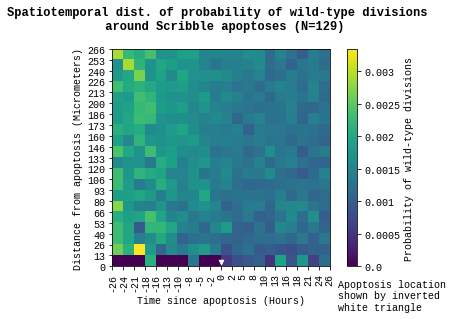

In [47]:
render.auto_plot_cumulative(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

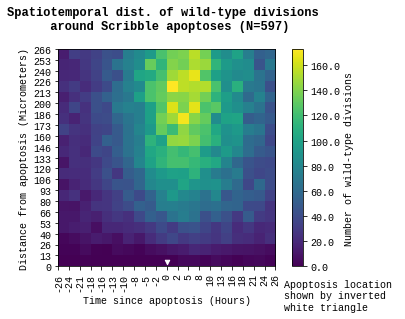

In [30]:
render.auto_plot_cumulative(N_events,
                     'N_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.0025),
                      include_apop_bin = True,      
                      SI = True)

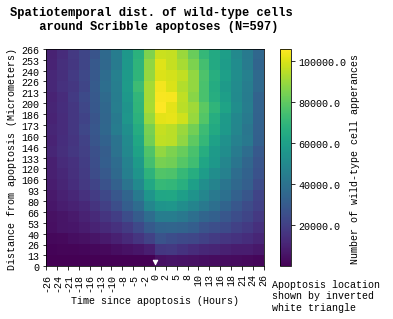

In [31]:
render.auto_plot_cumulative(N_cells,
                     'N_cells',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.0025),
                      include_apop_bin = True,      
                      SI = True)

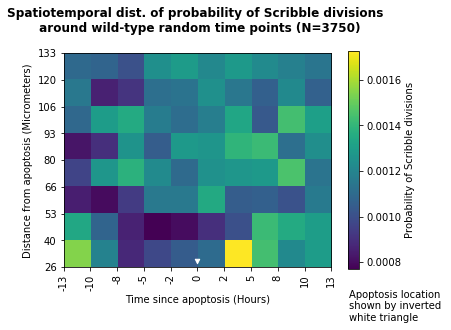

In [6]:
render.auto_plot_cumulative_defaulttext(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event,
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.0025),
                      include_apop_bin = False,      
                      SI = True)

# Coarse-graining preexisting plots

crop so that there is an equal number of bins on each side of apop point (crop two bins from top so that apop spatial bin isnt excluded)

In [140]:
N_cells_crop = N_cells[:-2,1:-1]
N_events_crop = N_events[:-2,1:-1]

In [54]:
def coarse_array(array, coarseness):
# This function takes a coarseness factor and reshapes an array according to that. Ie. a 8x8 array with coarseness factor 2 becomes a 4x4 array with each new element the sum of the previous 4
    temp = array.reshape((array.shape[0] // coarseness, coarseness,
                                array.shape[1] // coarseness, coarseness))
    coarse_array = np.sum(temp, axis=(1,3))
    
    return coarse_array

In [141]:
N_cells_coarse = coarse_array(N_cells_crop, 2)
N_events_coarse = coarse_array(N_events_crop, 2)

In [142]:
P_events_coarse = N_events_coarse/N_cells_coarse

In [143]:
save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/'

Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/320.320.4/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839).pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/320.320.4/scr_apop_wt_div/Spatiotemporal dist. of probability of wild-type divisions 
 around Scribble apoptoses (N=1839) (updated 20210714-123459).pdf


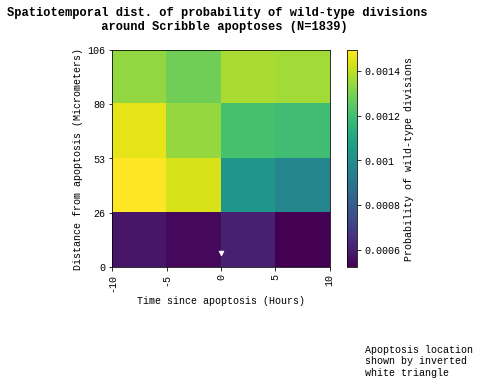

In [144]:
render.auto_plot_cumulative(P_events_coarse,
                     'P_events',
                      N,
                      4  ,
                      320 ,
                      320 , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      '',#cbar_lim = (0, 0.0017),
                      include_apop_bin = True,      
                      SI = True)

Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/320.320.4/scr_apop_wt_div/Spatiotemporal dist. of wild-type divisions 
 around Scribble apoptoses (N=1839).pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/320.320.4/scr_apop_wt_div/Spatiotemporal dist. of wild-type divisions 
 around Scribble apoptoses (N=1839) (updated 20210714-123524).pdf


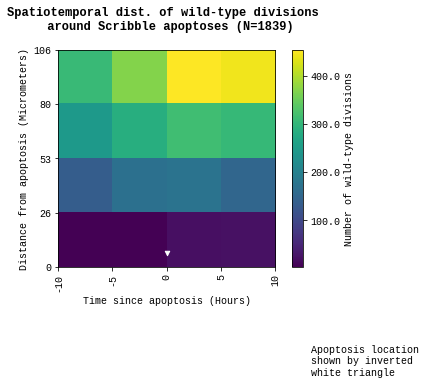

In [145]:
render.auto_plot_cumulative(N_events_coarse,
                     'N_events',
                      N,
                      4  ,
                      320 ,
                      320 , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/320.320.4/scr_apop_wt_div/Spatiotemporal dist. of wild-type cells 
 around Scribble apoptoses (N=1839).pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/320.320.4/scr_apop_wt_div/Spatiotemporal dist. of wild-type cells 
 around Scribble apoptoses (N=1839) (updated 20210714-123527).pdf


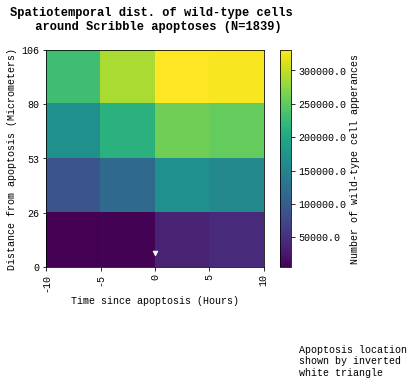

In [146]:
render.auto_plot_cumulative(N_cells_coarse,
                     'N_cells',
                      N,
                      4  ,
                      320 ,
                      320 , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

# Completely automated cumulative graph generation from single cell graph directory

In [27]:
root_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/400.400.10/'
save_parent_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/spatial_crop_cbarlim_0_0.002')

In [28]:
list_of_graph_types = os.listdir(root_dir)

for graph_type in list_of_graph_types:
    single_cell_heatmap_location = os.path.join(root_dir,graph_type)

    analysis_info = single_cell_heatmap_location.split('individual_spatiotemporal_heatmaps/')[1]

    radius, t_range, num_bins = list(map(int,analysis_info.split('/')[0].split('.') ))

    focal_cell, focal_event , subject_cell, subject_event = analysis_info.split('/')[1].split('_')
    
    N_cells, N_events = np.zeros((num_bins, num_bins)), np.zeros((num_bins, num_bins))
    N = 0
    for heatmap_ID in natsorted(os.listdir(single_cell_heatmap_location)):
        if 'N_cells' in heatmap_ID:
            N_cells += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
        if 'N_events' in heatmap_ID:
            N_events += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
            N+=1
    P_events = N_events/N_cells
    
    render.auto_plot_cumulative(P_events,
                                 'P_events',
                                  N,
                                  num_bins  ,
                                  radius ,
                                  t_range , 
                                  focal_cell, 
                                  focal_event, 
                                  subject_cell, 
                                  subject_event, 
                                  save_parent_dir ,
                                  cbar_lim = (0, 0.002),
                                  include_apop_bin = False,      
                                  SI = True)
    plt.clf()
    
    render.auto_plot_cumulative(N_events,
                                 'N_events',
                                  N,
                                  num_bins  ,
                                  radius ,
                                  t_range , 
                                  focal_cell, 
                                  focal_event, 
                                  subject_cell, 
                                  subject_event, 
                                  save_parent_dir ,
                                  '',#cbar_lim = (0, 0.0025),
                                  include_apop_bin = False,      
                                  SI = True)
    plt.clf()
    
    render.auto_plot_cumulative(N_cells,
                                 'N_cells',
                                  N,
                                  num_bins  ,
                                  radius ,
                                  t_range , 
                                  focal_cell, 
                                  focal_event, 
                                  subject_cell, 
                                  subject_event, 
                                  save_parent_dir ,
                                  '',#cbar_lim = (0, 0.0025),
                                  include_apop_bin = False,      
                                  SI = True)
    plt.clf()

Filename /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/spatial_crop_cbarlim_0_0.002/400.400.10/scr_apop_scr_div/Spatiotemporal dist. of probability of Scribble divisions 
 around Scribble apoptoses (N=1839).pdf already exists, saving as updated copy
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/spatial_crop_cbarlim_0_0.002/400.400.10/scr_apop_scr_div/Spatiotemporal dist. of probability of Scribble divisions 
 around Scribble apoptoses (N=1839) (updated 20210605-182104).pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/spatial_crop_cbarlim_0_0.002/400.400.10/scr_apop_scr_div/Spatiotemporal dist. of Scribble divisions 
 around Scribble apoptoses (N=1839).pdf
Plot saved at  /home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/spatial_crop_cbarlim_0_0.002/400.400.10/scr_apop_scr_div/Spatiotemporal dist. of Scribble cells 

<Figure size 432x288 with 0 Axes>

# New plot that shows many arrays randomly sampled from cumulative array 

In [ ]:
array1 = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos4_70_RFP_N_cells.npy')

In [ ]:
array2 = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos6_8_RFP_N_cells.npy')

In [ ]:
combined_array = array1*array2        cb = plt.colorbar(label = 'label')
        ax = cb.ax
        text = ax.yaxis.label
        font = matplotlib.font_manager.FontProperties(family='Liberation Mono')
        text.set_font_properties(font)


In [ ]:
arrays = [array1, array2]

In [ ]:
for array in arrays:
    for i in array:
        for j in i:
            if j == np.nan:
                continue
            else:
                print(j)

In [ ]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(array1)
a.set_title('array1')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(array2)
a.set_title('array2')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(combined_array)
a.set_title('combined')